## Credit Card Approval

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
applicants_df = pd.read_csv('application_record.csv')
applicants_df.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [4]:
applicants_df.shape

(438557, 18)

## Dataset Properties

#### Shape

In [5]:
applicants_df.shape

(438557, 18)

#### Columns

In [6]:
applicants_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

#### Numerical Columns

In [7]:
applicants_df.select_dtypes(include='number').columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')

#### Categorical Columns

In [8]:
applicants_df.select_dtypes(include='object').columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

## Statistics

#### Quantiles

In [9]:
applicants_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


#### Correlations

In [10]:
applicants_df.corr(numeric_only=True)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000


## Data Cleaning

#### Rename Columns

In [11]:
applicants_df.rename(columns={'ID':'id', 'CODE_GENDER':'gender', 'FLAG_OWN_CAR':'car_owned', 'FLAG_OWN_REALTY':'reality_owned', 
                              'CNT_CHILDREN':'childrens', 'AMT_INCOME_TOTAL':'income', 'NAME_EDUCATION_TYPE':'education', 'DAYS_BIRTH':'days_on_earth',
                              'NAME_FAMILY_STATUS':'family_status', 'NAME_INCOME_TYPE':'income_type', 'NAME_HOUSING_TYPE':'house_type', 
                              'DAYS_EMPLOYED':'employed_days', 'FLAG_MOBIL':'have_mobile','FLAG_WORK_PHONE': 'mobile_working', 'FLAG_PHONE':'have_phone',
                              'FLAG_EMAIL':'have_email', 'OCCUPATION_TYPE':'occupation_type', 'CNT_FAM_MEMBERS':'family_members'
                             }, inplace=True)

#### Remove Duplicates

In [12]:
applicants_df.duplicated().sum()

0

#### Nulls

In [13]:
applicants_df.isnull().sum()

id                      0
gender                  0
car_owned               0
reality_owned           0
childrens               0
income                  0
income_type             0
education               0
family_status           0
house_type              0
days_on_earth           0
employed_days           0
have_mobile             0
mobile_working          0
have_phone              0
have_email              0
occupation_type    134203
family_members          0
dtype: int64

#### Uniques

In [14]:
applicants_df['gender'].unique()

array(['M', 'F'], dtype=object)

In [15]:
applicants_df['car_owned'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
applicants_df['reality_owned'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
applicants_df['income_type'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [18]:
applicants_df['education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [19]:
applicants_df['family_status'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [20]:
applicants_df['house_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [21]:
applicants_df['have_mobile'].unique()

array([1], dtype=int64)

In [22]:
applicants_df['have_email'].unique()

array([0, 1], dtype=int64)

In [23]:
applicants_df['have_phone'].unique()

array([0, 1], dtype=int64)

In [24]:
applicants_df['mobile_working'].unique()

array([1, 0], dtype=int64)

In [25]:
applicants_df['occupation_type'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [26]:
applicants_df['family_members'].unique()

array([ 2.,  1.,  5.,  3.,  4.,  6., 15.,  7., 20.,  9., 11., 14.,  8.])

#### Standardization

In [27]:
applicants_df['days_on_earth'] = applicants_df['days_on_earth'].abs()

In [28]:
applicants_df['employed_days'] = applicants_df['employed_days'].abs()

#### Drop Unwanted Columns

In [29]:
applicants_df.drop(columns=['have_mobile', 'id', 'family_status'], inplace=True)
applicants_df.head(3)

,gender,car_owned,reality_owned,childrens,income,income_type,education,house_type,days_on_earth,employed_days,mobile_working,have_phone,have_email,occupation_type,family_members
0,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,12005,4542,1,0,0,NaN,2.0
1,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,12005,4542,1,0,0,NaN,2.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,House / apartment,21474,1134,0,0,0,Security staff,2.0


#### Handle Missings

In [30]:
occupations = applicants_df['occupation_type'].dropna().unique()
applicants_df['occupation_type'] = applicants_df['occupation_type'].fillna(np.random.choice(occupations))

In [31]:
applicants_df.isnull().sum()

gender             0
car_owned          0
reality_owned      0
childrens          0
income             0
income_type        0
education          0
house_type         0
days_on_earth      0
employed_days      0
mobile_working     0
have_phone         0
have_email         0
occupation_type    0
family_members     0
dtype: int64

In [32]:
applicants_df.head(3)

,gender,car_owned,reality_owned,childrens,income,income_type,education,house_type,days_on_earth,employed_days,mobile_working,have_phone,have_email,occupation_type,family_members
0,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,12005,4542,1,0,0,Security staff,2.0
1,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,12005,4542,1,0,0,Security staff,2.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,House / apartment,21474,1134,0,0,0,Security staff,2.0


## EDA

#### Categorical Columns

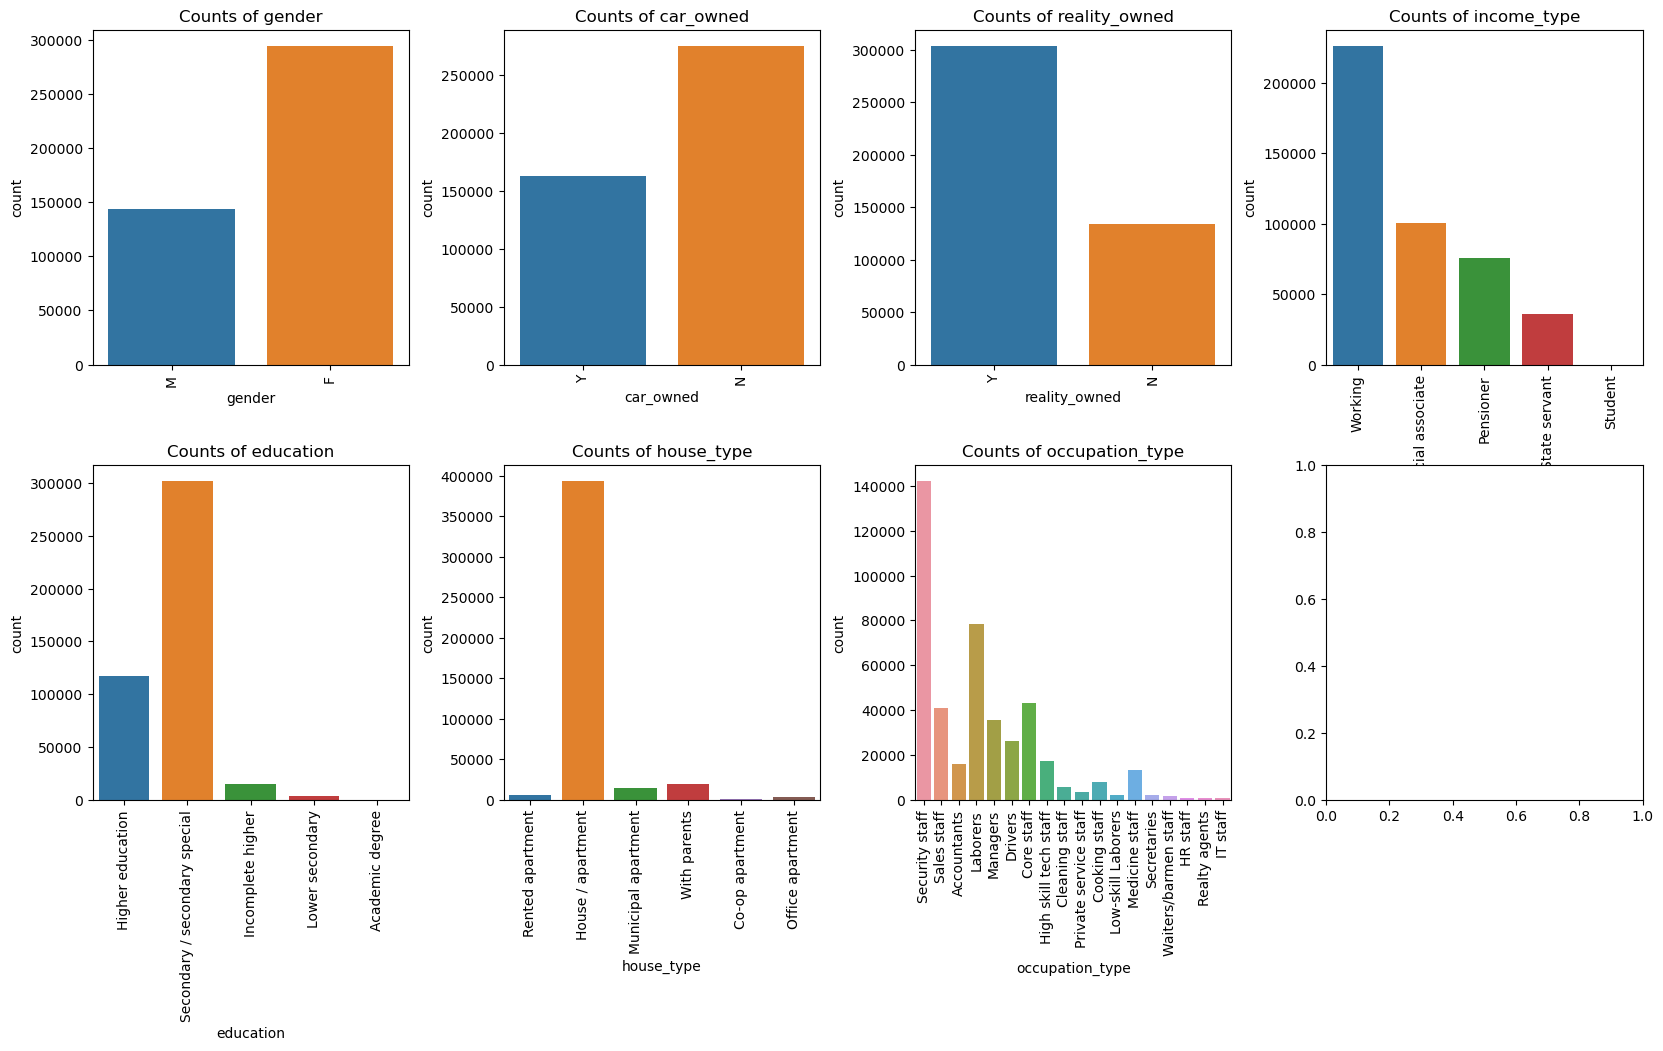

In [33]:
columns = applicants_df.select_dtypes(include='object').columns

plt.subplots(2,4,figsize=(4*5, 2*5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,4,k)
    sns.countplot(x = i, data = applicants_df)
    plt.title(f'Counts of {i}')
    plt.xticks(rotation = 90)
    k += 1

plt.show()

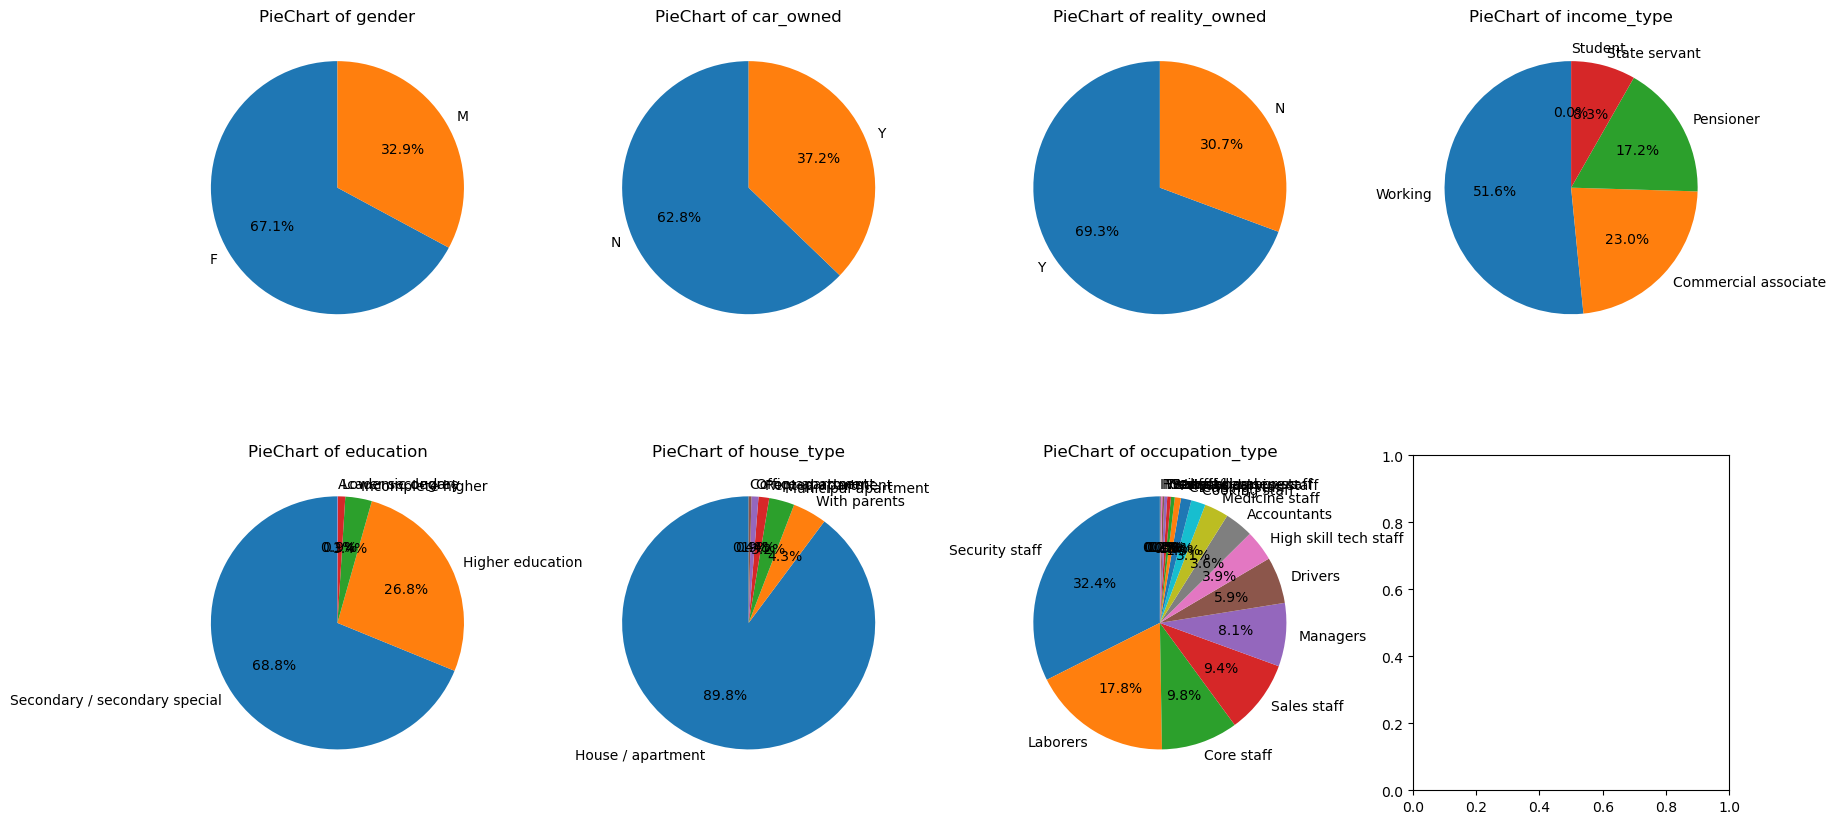

In [34]:
plt.subplots(2,4,figsize=(4*5, 2*5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    col_dict = dict(applicants_df[i].value_counts())
    plt.subplot(2,4,k)
    plt.pie(x = col_dict.values(), labels = col_dict.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(f'PieChart of {i}')
    k += 1

plt.show()

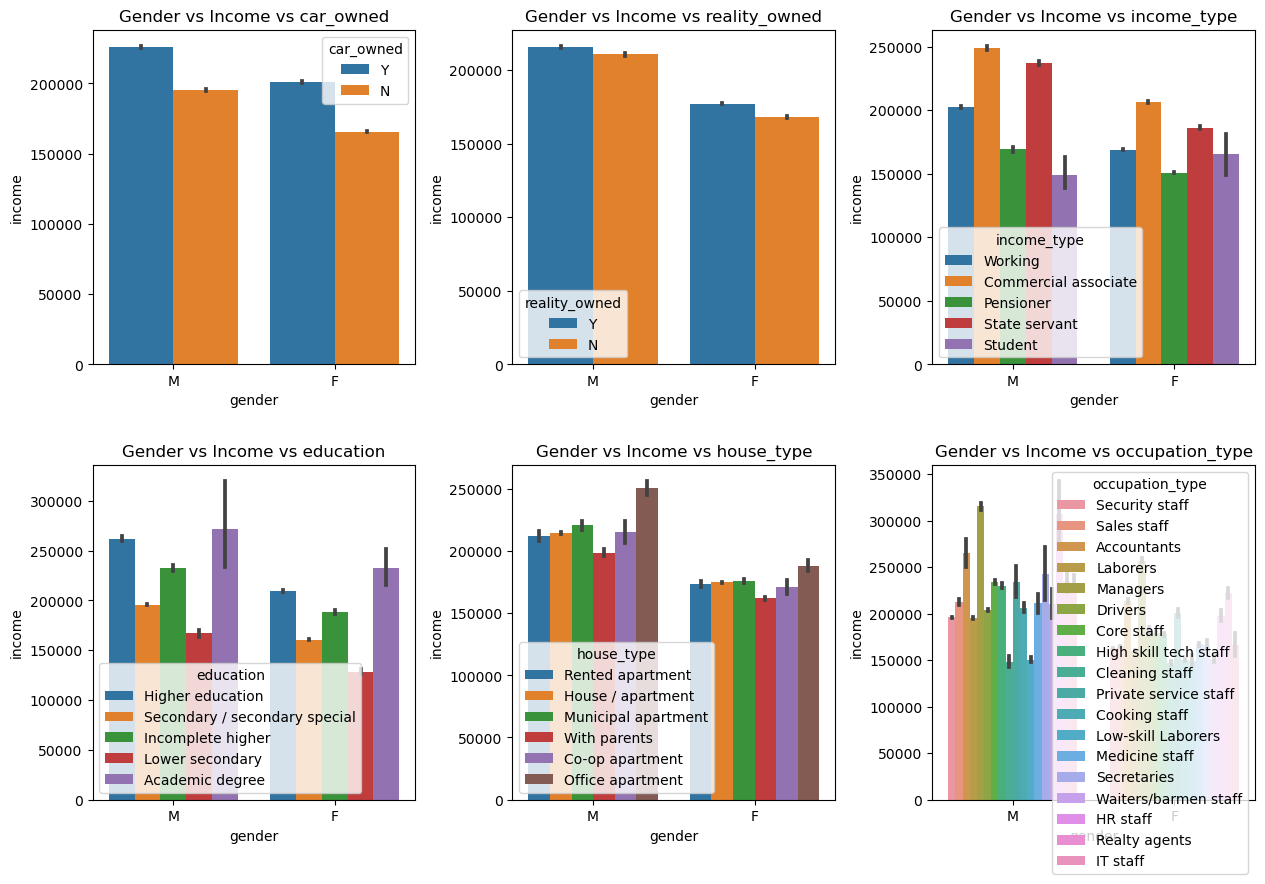

In [35]:
plt.subplots(2,3,figsize=(3*5, 2*5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns[1:]:
    plt.subplot(2,3,k)
    sns.barplot(x = 'gender', y = 'income', hue = i, data = applicants_df)
    plt.title(f'Gender vs Income vs {i}')
    k += 1

plt.show()

#### Numerical Columns

In [ ]:
columns = applicants_df.select_dtypes(include='number').columns

plt.subplots(2,4,figsize=(4*5, 2*5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,4,k)
    sns.histplot(x = i, data = applicants_df, kde = True)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

In [ ]:
plt.subplots(2,4,figsize=(4*5, 2*5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,4,k)
    sns.boxplot(x = i, data = applicants_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

In [ ]:
plt.subplots(2,4,figsize=(4*5, 2*5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,4,k)
    sns.violinplot(x = i, data = applicants_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

## Data Preprocessing

#### Column Transformer

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

childrens_count = sorted(applicants_df['childrens'].unique())
fam_members = sorted(applicants_df['family_members'].unique(), reverse=True)

ct = ColumnTransformer(transformers=[('minmax', MinMaxScaler(), ['days_on_earth']), 
                                     ('std_scaler', StandardScaler(), ['income', 'employed_days']), 
                                     ('ord_encoder',OrdinalEncoder(categories=[['N','Y'],['N','Y'],childrens_count,
                                                                               ['Student','Pensioner','State servant','Commercial associate','Working'],
                                                                               ['Lower secondary','Secondary / secondary special','Incomplete higher',
                                                                                'Higher education','Academic degree'],
                                                                               ['Office apartment','House / apartment','Co-op apartment',
                                                                                'Rented apartment','Municipal apartment','With parents'], 
                                                                               ['Laborers','Cleaning staff','Low-skill Laborers','Security staff',
                                                                                'Private service staff','Cooking staff','Waiters/barmen staff',
                                                                                'Drivers','Secretaries','Sales staff','Core staff','Realty agents',
                                                                                'Accountants','HR staff','Medicine staff','IT staff',
                                                                                'High skill tech staff','Managers']]),
                                      ['car_owned','reality_owned','childrens','income_type','education','house_type',
                                       'occupation_type']), 
                                     ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
                                      ['gender','family_members'])],
                       remainder='passthrough', sparse_threshold=0)
ct

## Model Development

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[('preprocessor', ct), ('kmeans', KMeans(n_clusters=2))])
model.fit(applicants_df)

## Model Evaluation

In [ ]:
X_pr = ct.fit_transform(applicants_df)

In [ ]:
from sklearn.metrics import davies_bouldin_score

print('Davies bouldin Score: ', davies_bouldin_score(X_pr, model.steps[1][1].labels_))

## Predictions Visualization

In [ ]:
plt.subplots(1,2,figsize=(2*5,1*5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1,2,1)
sns.scatterplot(y = 'days_on_earth', x = 'income', data = applicants_df)
plt.title('Original Data Points')

applicants_df['Labels'] = model.predict(applicants_df)

plt.subplot(1,2,2)
sns.scatterplot(y = 'days_on_earth', x = 'income', data = applicants_df, hue = 'Labels')
plt.title('Predicted Data Points')

plt.show()

In [ ]:
applicants_df['Labels'].value_counts()